In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from qutip import (about, basis, correlation_matrix_quadrature, destroy,
                   expect, logarithmic_negativity, mesolve, num, ptrace, qeye,
                   tensor, wigner, wigner_covariance_matrix)

%matplotlib inline

## Parameters

In [51]:
chi = 0.2
N1 = 100
N2 = 100

## OPERATORS AND HAMILTONIAN

In [52]:
a = tensor(destroy(N1), qeye(N2))
na = tensor(num(N1), qeye(N2))
b = tensor(qeye(N1), destroy(N2))
nb = tensor(qeye(N1), num(N2))

In [53]:
H = -chi * (a * b + a.dag() * b.dag())

In [54]:
# start in the ground (vacuum) state
psi0 = tensor(basis(N1, 0), basis(N2, 0))

## evolution

In [55]:
tlist = np.linspace(0, 100, 1000)

In [56]:
c_ops = []

In [57]:
e_ops = []

In [58]:
output = mesolve(H, psi0, tlist, c_ops, e_ops)
output

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

## Expectation values and standard deviations

In [59]:
na_e = np.zeros(tlist.shape)
na_s = np.zeros(tlist.shape)
nb_e = np.zeros(tlist.shape)
nb_s = np.zeros(tlist.shape)

for idx, psi in enumerate(output.states):
    na_e[idx] = expect(na, psi)
    na_s[idx] = expect(na * na, psi)
    nb_e[idx] = expect(nb, psi)
    nb_s[idx] = expect(nb * nb, psi)

# substract the average squared to obtain variances
na_s = na_s - na_e**2
nb_s = nb_s - nb_e**2

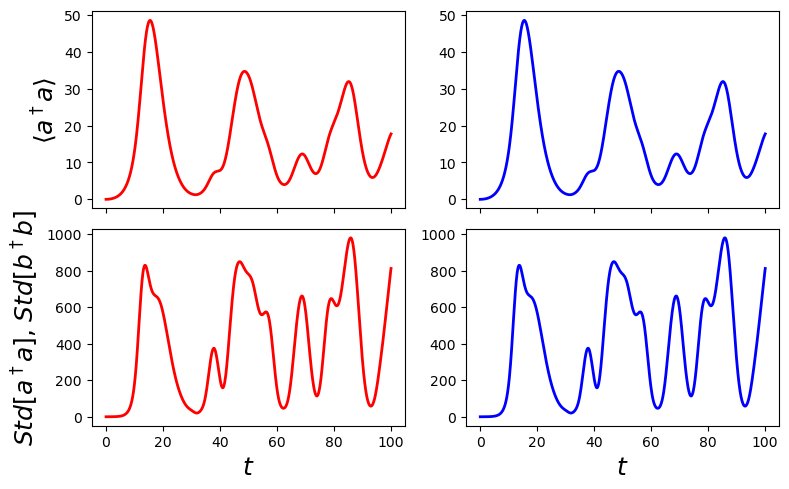

In [61]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(8, 5))

line1 = axes[0, 0].plot(tlist, na_e, "r", linewidth=2)
axes[0, 0].set_ylabel(r"$\langle a^\dagger a \rangle$", fontsize=18)

line2 = axes[0, 1].plot(tlist, nb_e, "b", linewidth=2)

line3 = axes[1, 0].plot(tlist, na_s, "r", linewidth=2)
axes[1, 0].set_xlabel("$t$", fontsize=18)
axes[1, 0].set_ylabel(r"$Std[a^\dagger a]$, $Std[b^\dagger b]$", fontsize=18)

line4 = axes[1, 1].plot(tlist, nb_s, "b", linewidth=2)
axes[1, 1].set_xlabel("$t$", fontsize=18)

fig.tight_layout()